In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('PrestonJan2019.csv')
df.head()

/Users/joe/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (6,8,9,10,16,33,38,58,75,86,87,88) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,created_at,text,attachments.media,attachments.media_keys,attachments.poll.duration_minutes,attachments.poll.end_datetime,attachments.poll.id,attachments.poll.options,attachments.poll.voting_status,...,reply_settings,source,withheld.scope,withheld.copyright,withheld.country_codes,type,__twarc.retrieved_at,__twarc.url,__twarc.version,Unnamed: 93
0,1090312029834014722,2019-01-29T18:13:39.000Z,RT! #CONTEST #Win a Gorgeous Quality Vegan Lea...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,everyone,Twitter for iPhone,NaN,NaN,NaN,retweeted,2021-08-24T20:12:10+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.4.1,NaN
1,1090399186992779264,2019-01-29T23:59:59.000Z,RT @candi260: RT! #CONTEST #Win a Gorgeous Qua...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,everyone,Twitter for iPhone,NaN,NaN,NaN,NaN,2021-08-24T20:12:10+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.4.1,NaN
2,1090172698808995842,2019-01-29T09:00:00.000Z,Meet The Muslims Who Want to Stop The Slaughte...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,everyone,TweetDeck,NaN,NaN,NaN,retweeted,2021-08-24T20:12:10+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.4.1,NaN
3,1090399163043348480,2019-01-29T23:59:53.000Z,RT @AlBawabaEnglish: Meet The Muslims Who Want...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,everyone,Twitter for iPad,NaN,NaN,NaN,NaN,2021-08-24T20:12:10+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.4.1,NaN
4,1090399145951723521,2019-01-29T23:59:49.000Z,I should be asleep but about two hours ago I d...,"[{""preview_image_url"": ""https://pbs.twimg.com/...","[""16_1090399133037404166""]",NaN,NaN,NaN,NaN,NaN,...,everyone,Twitter for Android,NaN,NaN,NaN,NaN,2021-08-24T20:12:10+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.4.1,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277740 entries, 0 to 1277739
Data columns (total 94 columns):
 #   Column                                           Non-Null Count    Dtype  
---  ------                                           --------------    -----  
 0   id                                               1277740 non-null  int64  
 1   created_at                                       1277740 non-null  object 
 2   text                                             1277740 non-null  object 
 3   attachments.media                                201228 non-null   object 
 4   attachments.media_keys                           201228 non-null   object 
 5   attachments.poll.duration_minutes                1641 non-null     float64
 6   attachments.poll.end_datetime                    1641 non-null     object 
 7   attachments.poll.id                              1641 non-null     float64
 8   attachments.poll.options                         1641 non-null     object 
 9   at

In [53]:
import pandas as pd
import glob

path = r'/Users/joe/Code/TwitterTest' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

In [6]:
# remove tagged types
df = df[df['type'].isnull()]

# remove tweets with RT string
df = df[~df['text'].str.contains('RT')]

In [7]:
# tweet.user.created_at,tweet.geo,tweet.coordinates,tweet.retweet_count,tweet.favorite_count])
    
df = df[['id','created_at', 'text','author.id','author.created_at', 'author.username','author.location','author.public_metrics.followers_count','geo.full_name','public_metrics.like_count','public_metrics.retweet_count']]
df.head()

,id,created_at,text,author.id,author.created_at,author.username,author.location,author.public_metrics.followers_count,geo.full_name,public_metrics.like_count,public_metrics.retweet_count
4,1090399145951723521,2019-01-29T23:59:49.000Z,I should be asleep but about two hours ago I d...,750768965778112514,2016-07-06T19:10:44.000Z,crittermischief,Amaurot,133,NaN,0,0
7,1090399137583906816,2019-01-29T23:59:47.000Z,My specialty is vegan tacos xD lol,887264682179821569,2017-07-18T10:55:59.000Z,ohhitskittyface,NaN,139,NaN,0,0
8,1090399127949721601,2019-01-29T23:59:45.000Z,@BriMalandro @emoblackthot “Plant based pussy ...,894316419785121792,2017-08-06T21:57:04.000Z,0hdatme,NaN,164,NaN,0,0
14,1090399054570442754,2019-01-29T23:59:27.000Z,"""Vegan Make-Ahead Chia Oats"" #food #eat #healt...",1586307386,2013-07-11T16:52:01.000Z,FoodieNewsie,NaN,1339,NaN,0,0
19,1090399000031883264,2019-01-29T23:59:14.000Z,#theveganfoodie 🏋🏽‍♀️🏋🏽‍♀️ 15 x 4 @ The Vegan ...,31351113,2009-04-15T05:41:56.000Z,TheVeganFoode,United States,2214,"New Tecumseth, Ontario",0,0


In [8]:
# sort by date
df['created_at'] =pd.to_datetime(df.created_at)
df.sort_values(by='created_at')
df = df.reset_index()

In [9]:
# sentiment analysis
import nltk
nltk.download([
    "vader_lexicon",
])
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

def get_sentiment(string):
    return sia.polarity_scores(string)['compound']

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/joe/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [11]:
470988 / 1277740

0.3686102023885924

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470988 entries, 0 to 470987
Data columns (total 12 columns):
 #   Column                                 Non-Null Count   Dtype              
---  ------                                 --------------   -----              
 0   index                                  470988 non-null  int64              
 1   id                                     470988 non-null  int64              
 2   created_at                             470988 non-null  datetime64[ns, UTC]
 3   text                                   470988 non-null  object             
 4   author.id                              470988 non-null  int64              
 5   author.created_at                      470988 non-null  object             
 6   author.username                        470988 non-null  object             
 7   author.location                        369659 non-null  object             
 8   author.public_metrics.followers_count  470988 non-null  int64             

In [12]:
df['sentiment'] = df['text'].apply(get_sentiment)
df.head()

,index,id,created_at,text,author.id,author.created_at,author.username,author.location,author.public_metrics.followers_count,geo.full_name,public_metrics.like_count,public_metrics.retweet_count,sentiment
0,4,1090399145951723521,2019-01-29 23:59:49+00:00,I should be asleep but about two hours ago I d...,750768965778112514,2016-07-06T19:10:44.000Z,crittermischief,Amaurot,133,NaN,0,0,-0.6652
1,7,1090399137583906816,2019-01-29 23:59:47+00:00,My specialty is vegan tacos xD lol,887264682179821569,2017-07-18T10:55:59.000Z,ohhitskittyface,NaN,139,NaN,0,0,0.7650
2,8,1090399127949721601,2019-01-29 23:59:45+00:00,@BriMalandro @emoblackthot “Plant based pussy ...,894316419785121792,2017-08-06T21:57:04.000Z,0hdatme,NaN,164,NaN,0,0,0.0000
3,14,1090399054570442754,2019-01-29 23:59:27+00:00,"""Vegan Make-Ahead Chia Oats"" #food #eat #healt...",1586307386,2013-07-11T16:52:01.000Z,FoodieNewsie,NaN,1339,NaN,0,0,0.0000
4,19,1090399000031883264,2019-01-29 23:59:14+00:00,#theveganfoodie 🏋🏽‍♀️🏋🏽‍♀️ 15 x 4 @ The Vegan ...,31351113,2009-04-15T05:41:56.000Z,TheVeganFoode,United States,2214,"New Tecumseth, Ontario",0,0,0.0000


In [1]:
df.sentiment.plot(kind='hist',bins=8)

NameError: name 'df' is not defined

<AxesSubplot:>

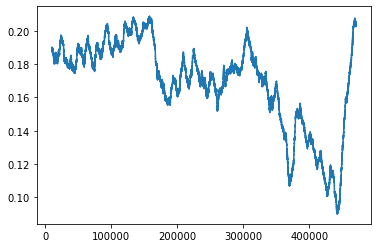

In [17]:
df['sentiment'].rolling(10000).mean().plot()

In [15]:
# output data
df.to_csv('PrestonJan2019Tidy.csv', index=False)

In [5]:
import pandas as pd
df = pd.read_csv('PrestonJan2019Tidy.csv')
df.head()

,index,id,created_at,text,author.id,author.created_at,author.username,author.location,author.public_metrics.followers_count,geo.full_name,public_metrics.like_count,public_metrics.retweet_count,sentiment
0,4,1090399145951723521,2019-01-29 23:59:49+00:00,I should be asleep but about two hours ago I d...,750768965778112514,2016-07-06T19:10:44.000Z,crittermischief,Amaurot,133,NaN,0,0,-0.6652
1,7,1090399137583906816,2019-01-29 23:59:47+00:00,My specialty is vegan tacos xD lol,887264682179821569,2017-07-18T10:55:59.000Z,ohhitskittyface,NaN,139,NaN,0,0,0.7650
2,8,1090399127949721601,2019-01-29 23:59:45+00:00,@BriMalandro @emoblackthot “Plant based pussy ...,894316419785121792,2017-08-06T21:57:04.000Z,0hdatme,NaN,164,NaN,0,0,0.0000
3,14,1090399054570442754,2019-01-29 23:59:27+00:00,"""Vegan Make-Ahead Chia Oats"" #food #eat #healt...",1586307386,2013-07-11T16:52:01.000Z,FoodieNewsie,NaN,1339,NaN,0,0,0.0000
4,19,1090399000031883264,2019-01-29 23:59:14+00:00,#theveganfoodie 🏋🏽‍♀️🏋🏽‍♀️ 15 x 4 @ The Vegan ...,31351113,2009-04-15T05:41:56.000Z,TheVeganFoode,United States,2214,"New Tecumseth, Ontario",0,0,0.0000


In [35]:
london = df[(df['author.location'].str.contains('london', na=False)) | df['author.location'].str.contains('London', na=False)]

In [36]:
manchester = df[(df['author.location'].str.contains('manchester', na=False)) | df['author.location'].str.contains('Manchester', na=False)]

In [37]:
preston = df[(df['author.location'].str.contains('preston', na=False)) | df['author.location'].str.contains('Preston', na=False)]

<AxesSubplot:>

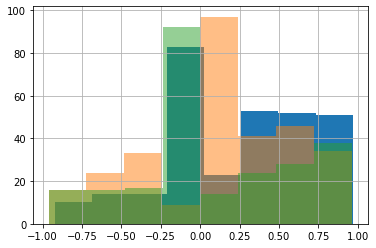

In [57]:
london['sentiment'].sample(n=300).hist(bins=8)
manchester['sentiment'].sample(n=300).hist(bins=8,alpha=0.5)
preston['sentiment'].hist(bins=8,alpha=0.5)

<AxesSubplot:>

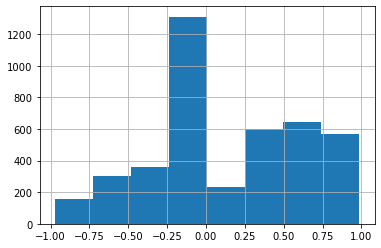

In [50]:
manchester['sentiment'].hist(bins=8)

<AxesSubplot:>

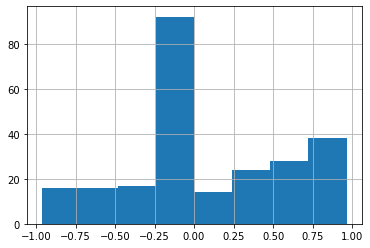

In [52]:
preston['sentiment'].hist(bins=8)

<AxesSubplot:>

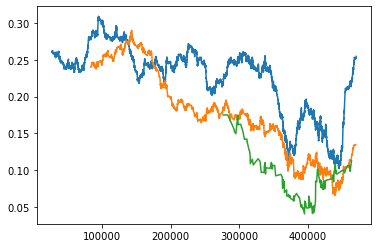

In [49]:
london['sentiment'].rolling(1000).mean().plot()
manchester['sentiment'].rolling(500).mean().plot()
preston['sentiment'].rolling(100).mean().plot()

In [58]:
london.to_csv('LondonJan2019.csv', index=False)
manchester.to_csv('ManchesterJan2019.csv', index=False)
preston.to_csv('PrestonJan2019.csv', index=False)